In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = 'q6600-benchmarks-game.xlsx'

In [3]:
# full HTML page to df
df = pd.read_excel(f, header=None, names=["type", "secs", "mem", "gz", "busy", "cpu load"])

In [4]:
# one section(table) in HTML to one df
grps = df.groupby(df.index // 4)
dfs = [dfg for _, dfg in grps]

In [5]:
dfs[1]

,type,secs,mem,gz,busy,cpu load
4,regex-redux,NaN,NaN,NaN,NaN,NaN
5,source,secs,mem,gz,busy,cpu load
6,Python 3,2.67,111864,1403,4.86,87% 30% 29% 35%
7,C gcc,1.42,152192,1397,3.4,100% 48% 48% 44%


In [6]:
# to be plot
new_dfs = []
for i, df in enumerate(dfs):
    try:
        new_row = pd.DataFrame({
            'program': df['type'].iloc[0],
            'Python 3': float(  df[df['type'].str.startswith('Python')]['secs'].iloc[0]  ),
            'C gcc': float(  df[df['type'].str.startswith('C')]['secs'].iloc[0]  ),
        }, index=[0])
    except:
        print(i)
    # print(new_row)
    new_dfs.append(new_row)

dst = pd.concat( new_dfs ).reset_index(drop=True)

10


In [7]:
dst

,program,Python 3,C gcc
0,pidigits,2.39,1.75
1,regex-redux,2.67,1.42
2,reverse-complement,16.41,1.92
3,k-nucleotide,72.58,4.84
4,binary-trees,80.82,3.59
5,fasta,63.63,1.46
6,fannkuch-redux,494.58,8.73
7,spectral-norm,170.10,1.98
8,n-body,891.12,7.30
9,mandelbrot,263.87,1.64


<Axes: xlabel='program'>

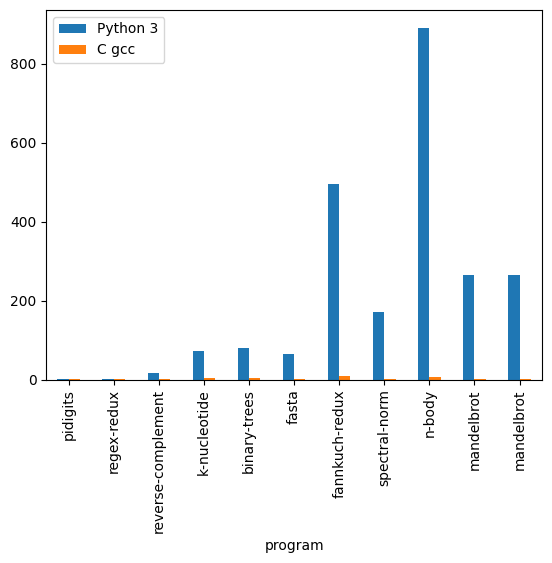

In [8]:
dst.plot(x="program", y=["Python 3", "C gcc"], kind="bar")

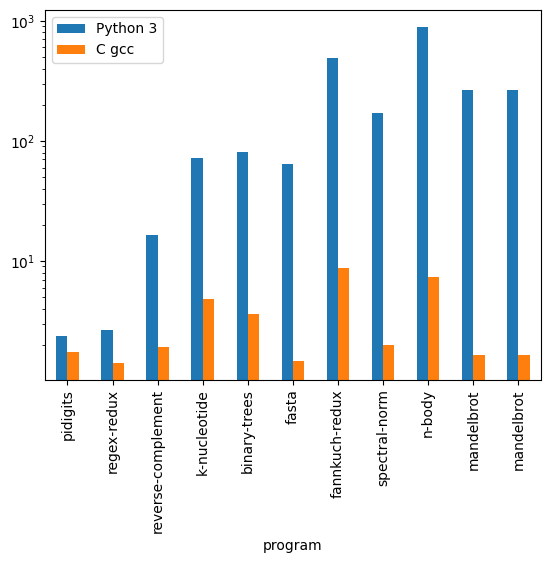

In [9]:
import matplotlib.pyplot as plt

dst.plot.bar(x="program", y=["Python 3", "C gcc"])
plt.yscale("log")
plt.show()